Importing necessary modules

In [164]:
import pandas as pd
import numpy as np
import geopandas as gpd
import math
import matplotlib.pyplot as plt

Importing the data and making new dataframe dat_num 

In [165]:
data = pd.read_csv("Ecommerce Customers.csv")

data_num = data[["Avg. Session Length","Time on App","Time on Website","Length of Membership","Yearly Amount Spent"]]


In [166]:
#data.describe(include='all') #inkludiert auch kategorielle Variabeln 

In [167]:
#data_num.head(5)

In [168]:
#data.isnull().sum() #Überprüfung auf fehlende Werte je Spalte 

Adress analysis

In [169]:
list_shortcut_states = ["AK","AL","AR","AZ","CA","CO","CT","DE","FL","GA","HI","IA","ID","IL","IN","KS","KY","LA","MA","MD","ME","MI","MN","MO","MS","MT","NC","ND","NE","NH","NJ","NM","NV","NY","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VA","VT","WA","WI","WV","WY"]
state_list = []

for i in data["Address"]:
    if "Box" in i:
        index_to_drop = data[data["Address"] == i].index.values 
        data.drop(index_to_drop, inplace = True)
    else:
        state = i.split(",")[-1].split()[0]

        if state in list_shortcut_states:
            state_list.append(state)
        else:
            index_to_drop = data[data["Address"] == i].index.values 
            data.drop(index_to_drop, inplace = True)


data.drop(["Email","Avatar","Address"], inplace = True, axis = 1)
data.insert(5, "State", state_list)

data_mixed = data
data_mixed.index = range(len(data_mixed.index))

#print(data_mixed.head(5))
#print(data_mixed.State.value_counts())



Distribution of customers among the states

   STATEFP   STATENS     AFFGEOID GEOID STUSPS                  NAME LSAD  \
1       02  01785533  0400000US02    02     AK                Alaska   00   
0       01  01779775  0400000US01    01     AL               Alabama   00   
26      05  00068085  0400000US05    05     AR              Arkansas   00   
2       04  01779777  0400000US04    04     AZ               Arizona   00   
27      06  01779778  0400000US06    06     CA            California   00   
3       08  01779779  0400000US08    08     CO              Colorado   00   
4       09  01779780  0400000US09    09     CT           Connecticut   00   
28      11  01702382  0400000US11    11     DE  District of Columbia   00   
5       12  00294478  0400000US12    12     FL               Florida   00   
6       13  01705317  0400000US13    13     GA               Georgia   00   
29      15  01779782  0400000US15    15     HI                Hawaii   00   
31      19  01779785  0400000US19    19     IA                  Iowa   00   

<AxesSubplot:>

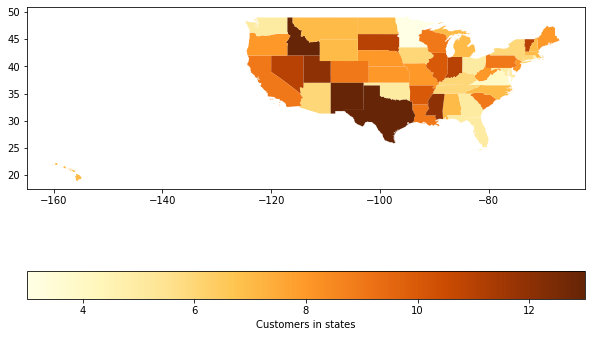

In [175]:
#states_and_customers_list = data_mixed.State.value_counts()
#print(type(states_and_customers_list))
#print(states_and_customers_list.head(5))
#print(states_and_customers_list["MO"],"Hi")
states = gpd.read_file("cb_2016_us_state_5m\cb_2016_us_state_5m.shp")
#print(states.head(10))

geos_to_drop = [26,29,51,52,53,54]
states.drop(geos_to_drop, inplace=True)


states_50 = states
states_50.index = range(len(states_50.index))

states_50.sort_values('STUSPS', inplace= True)
states_50.loc[28,"STUSPS"] = "DE"
print(states_50)


geo_list = []

for i in list_shortcut_states:
    #print(i," ",states_and_customers_list[i])
    geo_list.append(states_and_customers_list[i])
   
VALUES = gpd.GeoDataFrame(geo_list)


usa = pd.concat([states_50, VALUES], axis=1)
usa.columns = ["STATEFP","STATENS","AFFGEOID","GEOID","STUSPS","NAME","LSAD","ALAND","AWATER","geometry","Customers"]
#print(usa)


indexes_to_drop = [1]
# Alaska got dropped for visualisation
usa.drop(indexes_to_drop, inplace=True)

fig = plt.figure(1, figsize=(10,10))
ax = fig.add_subplot()

usa.plot(column="Customers",ax=ax, legend= True, cmap="YlOrBr", legend_kwds = {"label": "Customers in states", "orientation":"horizontal"})

Creating new customer groups for clustering 

In [171]:
print(data_mixed["State"].value_counts())

MO    13
DE    13
SC    13
OR    12
VT    12
FL    11
MS    11
MN    11
KS    11
NJ    10
NC    10
AZ     9
HI     9
AL     9
MI     9
WV     9
ME     9
ND     9
NY     8
IL     8
TX     8
PA     8
GA     8
KY     8
MT     8
MA     7
OK     7
WY     7
IN     7
IA     7
SD     7
AK     7
NH     7
RI     7
CA     6
NV     6
NE     6
VA     6
LA     6
NM     6
AR     6
WI     5
OH     5
CT     5
MD     5
CO     5
TN     5
UT     5
WA     4
ID     3
Name: State, dtype: int64


In [172]:
for i in data_mixed["State"]:
    # 12 - 10
    if i in (["MO","DE","SC","OR","VT","FL","MS","MN","KS","NJ","NC"]):
        print("Hello")
    # 9 - 8
    if i in (["AZ","HI","AL","MI","WV","ME","ND","NY","IL","TX","PA","GA","KY","MT"]):
        pass
    # 7 - 0
    if i in (["MA","OK","WY","IN","IA","SD","AK","NH","RI","CA","NV","NE","VA","LA","NM","AR","WI","OH","CT","MD","CO","TN","UT","WA","ID"]):
        pass

Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
